In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(a) Data Preparation

In [ ]:
# Generating the datasets
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

b) Data Visualization

Text(0, 0.5, 'y')

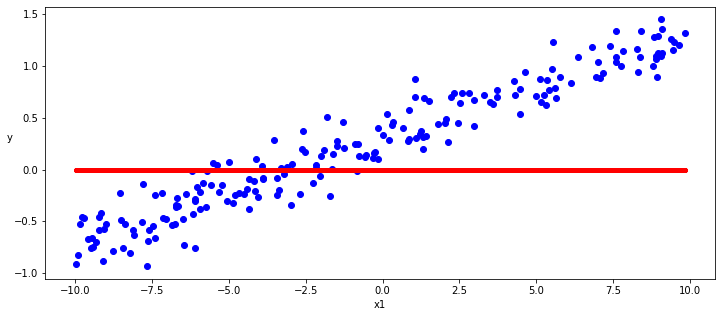

In [ ]:
# Data Visualization
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

c) defining loss function

In [ ]:
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

d) train our model

In [ ]:
# initialize parameters
epochs = 500
learning_rate = 0.001


class LinearRegression:
    def __init__(self):
        self.params = {
            "m" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        
    # Forward propagation
    def __call__(self,x): 
        y = self.params["m"] * x + self.params["b"]
        return y
    # Loss function
    def loss_func(self,y_true,y_pred):  
        return tf.reduce_mean((y_true - y_pred)**2/2)

model = LinearRegression()
for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [model.params["m"], model.params["b"]])
    # adjusting 
    model.params["m"].assign(model.params["m"] - learning_rate*dloss_dw)
    model.params["b"].assign(model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.12922419607639313
Step 40, Loss 0.1043972373008728
Step 60, Loss 0.0976056456565857
Step 80, Loss 0.0922398567199707
Step 100, Loss 0.08733013272285461
Step 120, Loss 0.08279336988925934
Step 140, Loss 0.07859867066144943
Step 160, Loss 0.0747201219201088
Step 180, Loss 0.07113390415906906
Step 200, Loss 0.06781795620918274
Step 220, Loss 0.06475191563367844
Step 240, Loss 0.06191694736480713
Step 260, Loss 0.059295654296875
Step 280, Loss 0.05687190219759941
Step 300, Loss 0.0546308234333992
Step 320, Loss 0.052558641880750656
Step 340, Loss 0.05064263194799423
Step 360, Loss 0.04887104034423828
Step 380, Loss 0.04723295196890831
Step 400, Loss 0.04571832716464996
Step 420, Loss 0.044317856431007385
Step 440, Loss 0.043022915720939636
Step 460, Loss 0.04182558134198189
Step 480, Loss 0.04071848839521408


c) display results

Text(0, 0.5, 'y')

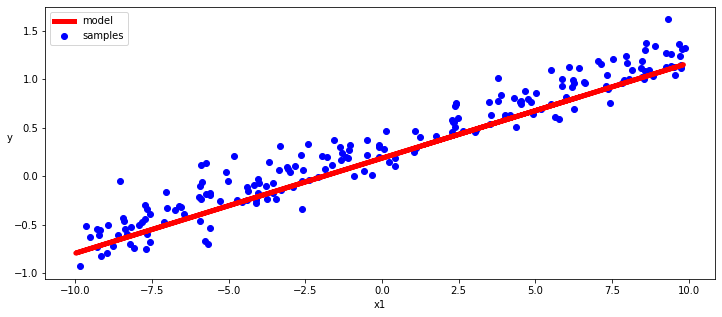

In [ ]:
# Data Visualization
x_train, y_train = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x_train,y_train, c = "b", label="samples")
ax.plot(x,model.params["m"]*x+model.params["b-"],"-r",linewidth = 5.0,label = "model")
ax.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)